# Author : Sukarn Pahuja
## The Sparks Foundation : Data Science and Business Analytics (GRIP JUNE'21)

# TASK-1 : Prediction Using Supervised ML
- Predict the percentage of an student based on the no. of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25 hrs/ day? 

### Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading the data

In [89]:
link = r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(link)

#display 10 rows
print('Data Frame - First 10 rows')
df.head(10)

Data Frame - First 10 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting of Imported Data - Visualisation

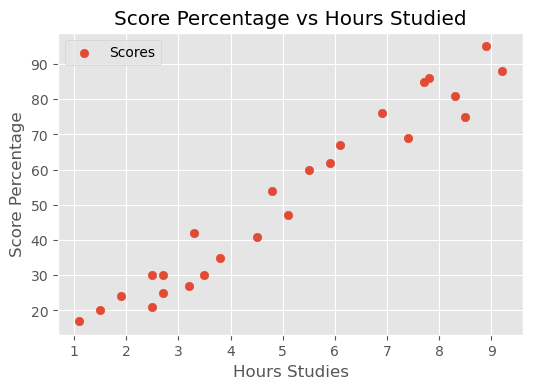

In [90]:
plt.style.use('ggplot')
plt.figure(dpi=100)
plt.scatter(x='Hours',y='Scores',data=df)
plt.title('Score Percentage vs Hours Studied')
plt.xlabel('Hours Studies')
plt.ylabel('Score Percentage')
plt.legend()
plt.show()

### Data Preprocessing and Model Training

In [91]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [101]:
#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#Training the model
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train)
print('Model Training Completed')

Model Training Completed


### Regression Plot

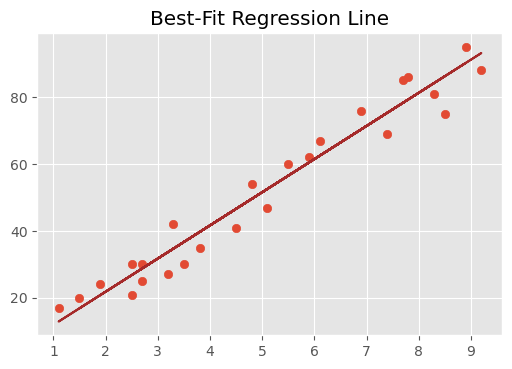

In [93]:
#visualising the best fit line of regression on test data
regline = regressor.coef_*X+regressor.intercept_

plt.figure(dpi=100)
plt.scatter(X, y)
plt.plot(X, regline,color='brown')
plt.title('Best-Fit Regression Line')
plt.show()

### Model Testing by making predictions

In [94]:
#using test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [95]:
#model prediction
y_pred = regressor.predict(X_test)
print('Model Prediction')

Model Prediction


In [96]:
#comparing original result with predicted results
com = pd.DataFrame({'Original Values': y_test, 'Predicted Values': y_pred}) 
print('Comparing Original values with predicted values')
com

Comparing Original values with predicted values


,Original Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visulizing the Comarison between Original and predicted values

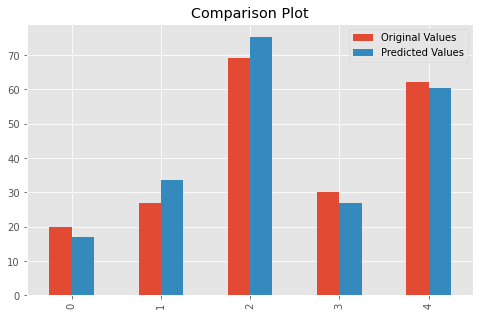

In [97]:
com.plot.bar(figsize=(8,5))
plt.title('Comparison Plot')
plt.show()

In [98]:
# evaluating the training and test score
print("Training Score evaluated is: ",regressor.score(X_train,y_train))
print("Test Score evaluated is: ",regressor.score(X_test,y_test))

Training Score evaluated is:  0.9515510725211552
Test Score evaluated is:  0.9454906892105356


### Result - Calculating the Predicted Score with the given data

In [99]:
# hours of study = 9.25
hr = 9.25
test = np.array([hr])
test = test.reshape(-1, 1)
result= regressor.predict(test)
print('**************************************')
print('           PREDICTED RESULT')
print('**************************************')
print("No of Hours = ",hr)
print("Predicted Score = ",result[0])

**************************************
           PREDICTED RESULT
**************************************
No of Hours =  9.25
Predicted Score =  93.69173248737538


**The Predicted Score if a student studies 9.25 hrs/day is 93.69**

### Model Evaluation

In [100]:
print('Mean Squared Error is :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error is :',metrics.mean_absolute_error(y_test, y_pred)) 
print('R-2 Score is :', metrics.r2_score(y_test, y_pred))

Mean Squared Error is : 21.5987693072174
Root Mean Squared Error is : 4.6474476121003665
Mean Absolute Error is : 4.183859899002975
R-2 Score is : 0.9454906892105356


### Thank You